### 정밀도-재현율 곡선

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [2]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

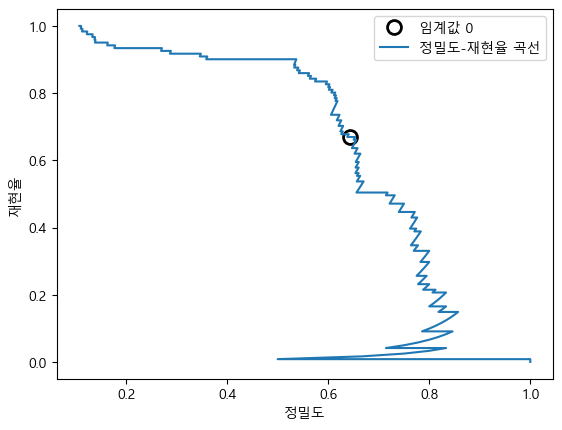

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') # warning 메세지 제거
import matplotlib.font_manager as fm # 한글폰트 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 부드러운 곡선을 만들기 위해 데이터 수 늘리기
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# 0에 가까운 임계값을 찾는다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="임계값 0", fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')
plt.show()

In [10]:
close_zero = np.argmin(np.abs(thresholds))
close_zero

999

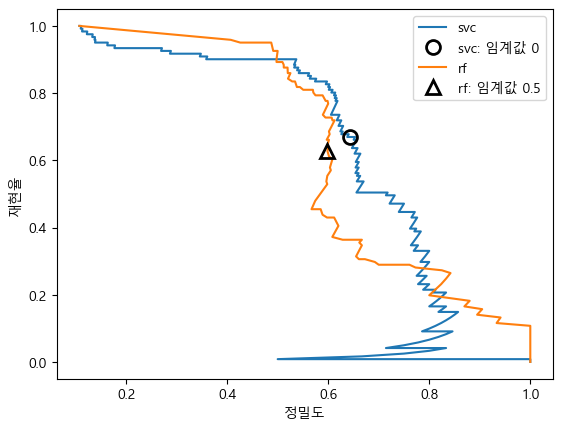

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공.
# precision_recall_curve(y_test, X_test로 예측한 확률 (decision_function, predict_proba))
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

# svc 정밀도-재현율 그래프
# close_zero = 0에 가까운 임계값 찾기
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="svc: 임계값 0", fillstyle='none', c='k', mew=2)

# RandomForestClassifier 정밀도-재현율 그래프
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label="rf: 임계값 0.5", fillstyle='none', c='k', mew=2)

plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show()

In [19]:
# svc와 randomforest의 f1_score
# f1_score는 기본 임계값에 대한 점수이므로 전체 성능을 비교하는데 유용하지만 세세한 부분은 알수없다.
from sklearn.metrics import f1_score
print("랜덤 포레스트의 f1_score: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [20]:
# 정밀도-재현율 곡선의 아래부분 면적 : 평균 정밀도
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


### 정밀도-재현율 그래프 바로 그리기 : PrecisionRecallDisplay

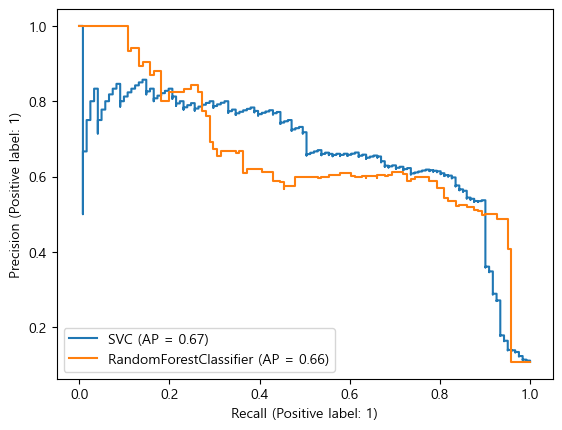

In [23]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# svc 곡선 그리기 .from_estimator를 이용하기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()
# 이때 그래프는 정밀도가 y축에, 재현율이 x축에 있다. 우리가 위에서 그린거랑 반대!

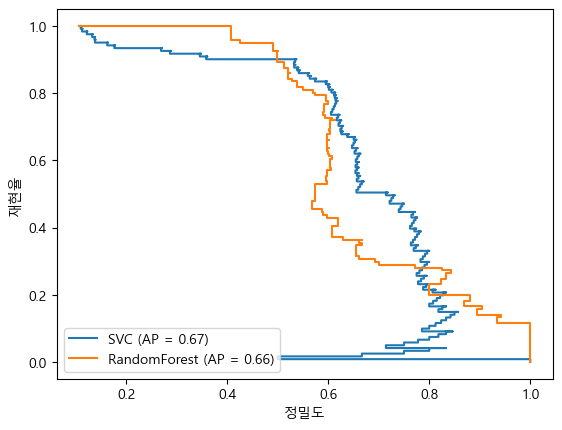

In [26]:
# x, y축에 각각 precision, recall 매개변수에 재현율과 정밀도 전달하기
fig, ax = plt.subplots()

disp = PrecisionRecallDisplay(precision=recall, recall=precision, average_precision=ap_svc, estimator_name='SVC')
disp.plot(ax=ax)
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf, average_precision=ap_rf, estimator_name='RandomForest')

disp.plot(ax=ax)
ax.set(xlabel="정밀도", ylabel="재현율")
plt.show()